## Przygotowanie danych do treningu

In [1]:
!pip3 install tensorflow

Dane testowe:
   - Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
   - Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
   - Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
   - Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.

In [3]:
# Import biblioteki numpy z aliasem 'np'.
# Biblioteka ta jest podstawą do obliczeń naukowych w Pythonie, oferuje wsparcie dla dużych,
# wielowymiarowych tablic i macierzy, wraz z kolekcją funkcji matematycznych do operowania na tych tablicach.
import numpy as np

# Import funkcji 'randint' z modułu 'random'.
# Funkcja ta generuje losową liczbę całkowitą w określonym zakresie, co jest przydatne w losowaniu, symulacjach,
# oraz innych zastosowaniach, gdzie potrzebne są losowe wartości całkowite.
from random import randint

# Import funkcji 'shuffle' z modułu 'sklearn.utils'.
# Funkcja ta losowo miesza kolekcje lub tablice. Jest szczególnie użyteczna w uczeniu maszynowym do mieszania danych
# przed podziałem na zestawy treningowe i testowe, aby usunąć wszelkie błędy, które mogłyby być wprowadzone przez kolejność danych.
from sklearn.utils import shuffle

# Import klasy 'MinMaxScaler' z modułu 'sklearn.preprocessing'.
# Klasa ta skaluje i transformuje cechy do określonego zakresu, zazwyczaj od 0 do 1, lub tak, aby minimalna i maksymalna
# wartość każdej cechy była skalowana do danego zakresu. Normalizacja ta może poprawić wydajność wielu algorytmów uczenia maszynowego.
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_samples = []
train_labels =[] # 1 - chory, 0 - zdrowy

In [6]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [7]:
print(train_samples)

[28, 78, 42, 97, 27, 70, 17, 71, 22, 66, 33, 79, 22, 89, 51, 99, 63, 90, 28, 83, 27, 85, 38, 89, 26, 89, 29, 66, 31, 72, 56, 71, 15, 93, 35, 87, 39, 95, 53, 89, 14, 94, 62, 68, 54, 71, 21, 93, 46, 75, 15, 89, 17, 76, 21, 90, 51, 65, 28, 98, 61, 65, 37, 80, 50, 65, 23, 86, 51, 73, 56, 90, 34, 96, 19, 70, 61, 75, 62, 88, 31, 78, 45, 95, 32, 71, 16, 96, 27, 72, 42, 66, 47, 78, 46, 67, 58, 81, 16, 78, 54, 99, 18, 77, 52, 75, 45, 93, 53, 89, 15, 100, 23, 94, 31, 79, 21, 69, 37, 65, 27, 86, 35, 93, 13, 91, 39, 82, 50, 86, 37, 73, 28, 68, 50, 86, 51, 69, 42, 74, 58, 90, 15, 89, 23, 95, 24, 99, 28, 83, 22, 66, 22, 94, 51, 90, 55, 82, 55, 87, 41, 95, 30, 73, 45, 100, 22, 92, 34, 84, 33, 95, 40, 75, 38, 83, 38, 78, 15, 95, 64, 69, 22, 78, 58, 75, 27, 92, 34, 77, 45, 97, 30, 68, 23, 95, 45, 69, 43, 71, 17, 83, 28, 72, 19, 75, 51, 68, 17, 66, 63, 87, 57, 91, 16, 82, 46, 79, 57, 97, 26, 80, 35, 65, 22, 86, 41, 87, 38, 83, 43, 90, 29, 81, 45, 97, 45, 72, 34, 73, 32, 86, 62, 92, 29, 66, 18, 95, 19, 7

In [8]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [9]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [10]:
print(train_samples)
print(train_labels)

[28 78 42 ... 92 23 72]
[1 0 1 ... 1 0 1]


In [18]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [19]:
print(train_samples)
print(train_labels)

[69 73 48 ... 14 68 43]
[1 1 0 ... 0 1 0]


In [21]:
scalar = MinMaxScaler(feature_range=(0,1))

In [23]:
scaled_train_samples = scalar.fit_transform(train_samples.reshape(-1,1))

In [24]:
print(scaled_train_samples)

[[0.64367816]
 [0.68965517]
 [0.40229885]
 ...
 [0.01149425]
 [0.63218391]
 [0.34482759]]


## Tworzenie Modelu

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [27]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [28]:
model = Sequential(
    [
        # Pierwsza warstwa definiująca kształt wejściowy.
        # Specyfikacja 'shape=(1,)' oznacza, że każdy wejściowy przykład danych będzie miał 1 cechę.
        Input(shape=(1,)),
        # Pierwsza warstwa gęsta z 16 neuronami, funkcja aktywacji ReLU.
        # 'ReLU' (Rectified Linear Unit) jest popularną funkcją aktywacji stosowaną w sieciach neuronowych,
        # która sprawia, że wszystkie wartości wejściowe mniejsze od zera są zerowane.
        Dense(units=16, activation='relu'),
        # Druga warstwa gęsta z 32 neuronami, funkcja aktywacji ReLU.
        # Więcej neuronów i kolejna warstwa ReLU zwiększają zdolność modelu do uczenia się skomplikowanych wzorców w danych.
        Dense(units=32, activation='relu'),
        # Warstwa wyjściowa z 2 jednostkami, funkcja aktywacji softmax.
        # Softmax sprawia, że wyjścia są interpretowane jako prawdopodobieństwa przynależności do jednej z dwóch klas.
        # Jest to typowa konfiguracja dla zadań klasyfikacyjnych z dwoma klasami wynikowymi.
        Dense(units=2, activation='softmax')
    ]
)

In [29]:
# Wywołanie metody summary() na obiekcie modelu.
# Metoda summary() wyświetla podsumowanie architektury modelu, w tym nazwy warstw, ich kształty (wymiary),
# oraz liczbę parametrów (zarówno trenowalnych, jak i nietrenowalnych) w każdej warstwie.
# Jest to przydatne narzędzie do szybkiego przeglądu struktury modelu i sprawdzenia, czy wszystkie warstwy są prawidłowo zdefiniowane.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Określenie dla funkcji kompilacji jakiego optimizera chcemy użyć (Adam).
# Podajemy decyzje dot. użycia atomu optimalizatora z szybkością uczenia się (0.0001) jest on bardzo popularny
# Określamy typ straty (sparse_categorical_crossentropy)
# Określamy jakie metryki chcemy zobaczyć. Dotyczy to tylko wydajności modelu (na podstawie czego chcemy móc ocenić nasz model)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Trenowanie modelu ma miejsce za każdym razem gdy wywołujemy funkcję dopasowania (fit)
# Określenie parametru x - czyli nasze dane wejściowe (obecnie przechowywane w skalowalnej zmiennej próbek)
# Określenie parametru y - czyli nasze dane docelowe (obecnie przechowywane w zmiennej etykiet)
# Określenie wielkości partii, którą chcemy wykorzystać do szkolenia (batch_size) - ile próbek znajduje się w jednej partii,
#                                  sktóre mają zostać przesłane i przetworzone przez sieci neuronowe jednocześnie (10)
# Ilość epok - oznacza to, że model będzie przetwarzał lub trenował wszystkie dane ze zbioru danych 30 razy przed zakończeniem
#                                  całego procesu szkoleniowego
# Shuffle, które ustawiamy na True (domyślnie jest ustawione na True - chodzi o pokazanie, że takie ustawienie jest) - ten parametr oznacza
#                                  że dane są domyslnie tasowane (to dobrze bo chcemy wymazać porządek danych przed przekazaniem
#                                  danych do modelu - model nie bedzie się więc uczył czegokolwiek na temat kolejności danych).
# Ostatni parametr to opcja pozwalająca zobaczyć dane wejsciowe za każdym razem, gdy uruchamiamy tę komendę funkcji dopasowania (fit).
#                                  Możemy go ustawić na 1 lub 2. 2 to najbardziej szczegółowy poziom pod względem komunikatów wejściowych.


model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/300
210/210 - 0s - loss: 0.2733 - accuracy: 0.9257 - 310ms/epoch - 1ms/step
Epoch 2/300
210/210 - 0s - loss: 0.2718 - accuracy: 0.9300 - 320ms/epoch - 2ms/step
Epoch 3/300
210/210 - 0s - loss: 0.2705 - accuracy: 0.9290 - 455ms/epoch - 2ms/step
Epoch 4/300
210/210 - 0s - loss: 0.2691 - accuracy: 0.9324 - 465ms/epoch - 2ms/step
Epoch 5/300
210/210 - 0s - loss: 0.2683 - accuracy: 0.9271 - 471ms/epoch - 2ms/step
Epoch 6/300
210/210 - 0s - loss: 0.2670 - accuracy: 0.9329 - 481ms/epoch - 2ms/step
Epoch 7/300
210/210 - 1s - loss: 0.2663 - accuracy: 0.9290 - 555ms/epoch - 3ms/step
Epoch 8/300
210/210 - 0s - loss: 0.2653 - accuracy: 0.9329 - 361ms/epoch - 2ms/step
Epoch 9/300
210/210 - 0s - loss: 0.2643 - accuracy: 0.9329 - 293ms/epoch - 1ms/step
Epoch 10/300
210/210 - 0s - loss: 0.2635 - accuracy: 0.9329 - 287ms/epoch - 1ms/step
Epoch 11/300
210/210 - 0s - loss: 0.2625 - accuracy: 0.9295 - 295ms/epoch - 1ms/step
Epoch 12/300
210/210 - 0s - loss: 0.2618 - accuracy: 0.9329 - 342ms/epoch 

In [33]:
# x=scaled_train_samples określa dane wejściowe do trenowania, które zostały przeskalowane wcześniej.
# y=train_labels określa prawdziwe etykiety dla danych treningowych.
# validation_split=0.1 wskazuje, że 10% danych treningowych powinno być użyte jako zestaw walidacyjny.
# batch_size=10 określa liczbę próbek, które będą przetwarzane w pojedynczej partii.
# epochs=30 ustawia liczbę epok treningowych, czyli ile razy cały zestaw danych przejdzie przez sieć neuronową.
# shuffle=True wskazuje, że dane treningowe powinny być tasowane przed każdą epoką.
# verbose=2 określa, jak wiele informacji o procesie trenowania powinno być wyświetlane (2 oznacza,
#                                                    że zostanie wyświetlony jeden wiersz na epokę).
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2244 - accuracy: 0.9492 - val_loss: 0.1391 - val_accuracy: 0.9810 - 573ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2244 - accuracy: 0.9492 - val_loss: 0.1395 - val_accuracy: 0.9810 - 326ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2243 - accuracy: 0.9492 - val_loss: 0.1392 - val_accuracy: 0.9810 - 321ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2243 - accuracy: 0.9481 - val_loss: 0.1393 - val_accuracy: 0.9810 - 308ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2242 - accuracy: 0.9492 - val_loss: 0.1394 - val_accuracy: 0.9810 - 316ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2240 - accuracy: 0.9492 - val_loss: 0.1398 - val_accuracy: 0.9810 - 340ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2240 - accuracy: 0.9492 - val_loss: 0.1395 - val_accuracy: 0.9810 - 343ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2240 - accuracy: 0.9492 - val_loss: 0.1396 - val_accuracy: 0.9810 - 354ms/epoch - 2ms/step


In [34]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [35]:
print(predictions)

[[0.12022109 0.87977886]
 [0.0904233  0.9095768 ]
 [0.94588375 0.05411619]
 ...
 [0.9585738  0.04142619]
 [0.1388378  0.8611621 ]
 [0.9478212  0.05217877]]


In [36]:
for i in predictions:
  print(i)

[0.12022109 0.87977886]
[0.0904233 0.9095768]
[0.94588375 0.05411619]
[0.9438787  0.05612131]
[0.30556676 0.6944333 ]
[0.04634047 0.95365953]
[0.93269974 0.0673002 ]
[0.9518552  0.04814483]
[0.9478212  0.05217877]
[0.1388378 0.8611621]
[0.07816479 0.92183524]
[0.03686625 0.96313375]
[0.07262278 0.9273772 ]
[0.9515011  0.04849897]
[0.9585738  0.04142619]
[0.01698583 0.9830141 ]
[0.02320057 0.9767994 ]
[0.94346935 0.05653064]
[0.9422245  0.05777549]
[0.95769536 0.04230457]
[0.94588375 0.05411619]
[0.9470542  0.05294575]
[0.0538998  0.94610023]
[0.10438656 0.8956134 ]
[0.04634047 0.95365953]
[0.01698583 0.9830141 ]
[0.03414391 0.96585613]
[0.02709242 0.9729076 ]
[0.94588375 0.05411619]
[0.9434694  0.05653064]
[0.93269974 0.0673002 ]
[0.9493238 0.0506762]
[0.9418039  0.05819614]
[0.01836615 0.98163384]
[0.01147642 0.9885236 ]
[0.95769536 0.04230457]
[0.9504237  0.04957625]
[0.21032777 0.7896722 ]
[0.21032777 0.7896722 ]
[0.9504237  0.04957625]
[0.95813686 0.04186318]
[0.9426424  0.05735771

In [37]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [38]:
for i in rounded_predictions:
  print(i)

1
1
0
0
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
1
1
1
0
1
0
0
0
0
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
1
0
0
1
1
0
1
1
1
0
0
1
1
0
1
1
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
0
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
1
1
0
0
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
1
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
1
1
1
1
1
1


In [39]:
# Włączenie integracji matplotlib z notatnikiem Jupyter, pozwalające na wyświetlanie wykresów bezpośrednio pod komórkami kodu.
%matplotlib inline

# Importowanie funkcji confusion_matrix z modułu sklearn.metrics.
# Confusion matrix (macierz błędów) to narzędzie do oceny wydajności modelu klasyfikacyjnego,
# prezentujące liczby predykcji dla każdej klasy w stosunku do rzeczywistych etykiet.
from sklearn.metrics import confusion_matrix

# Importowanie modułu itertools, który oferuje różne funkcje pomocnicze optymalizujące
# iteracyjne zadania (takie jak produkty kartezjańskie, permutacje, kombinacje itp.).
import itertools

# Importowanie biblioteki matplotlib.pyplot jako plt.
# Matplotlib to biblioteka do tworzenia statycznych, interaktywnych wykresów i wizualizacji w Pythonie.
import matplotlib.pyplot as plt

# Obliczanie macierzy błędów na podstawie rzeczywistych etykiet i przewidzianych przez model.
# 'y_true' to rzeczywiste etykiety, a 'rounded_predictions' to etykiety przewidziane przez model.
# Wynik, 'cm', jest dwuwymiarową tablicą, gdzie indeksy wierszy oznaczają rzeczywiste klasy,
# a indeksy kolumn wskazują przewidywane klasy.
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [46]:
# Definicja funkcji plot_confusion_matrix z parametrami: macierz błędów (cm), lista nazw klas, flaga normalizacji,
# tytuł wykresu i mapa kolorów.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):

    # Wieloliniowy komentarz dokumentujący funkcję, opisujący jej działanie i parametry.
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """

    # Wyświetlenie macierzy pomyłek jako obrazu z wykorzystaniem mapy kolorów cmap.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Ustawienie tytułu wykresu.
    plt.title(title)

    # Dodanie paska kolorów (colorbar), który pokazuje zakres wartości reprezentowanych przez kolory na mapie.
    plt.colorbar()

    # Ustalenie pozycji, na których mają być wyświetlane etykiety (tutaj dla klas).
    tick_marks = np.arange(len(classes))

    # Ustawienie etykiet osi X z nazwami klas, obrót etykiet o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)

    # Ustawienie etykiet osi Y z nazwami klas.
    plt.yticks(tick_marks, classes)

    # Warunek sprawdzający, czy użytkownik chce znormalizować macierz pomyłek.
    if normalize:
        # Normalizacja wartości macierzy pomyłek, dzielenie każdego wiersza przez sumę wartości w wierszu,
        # przekształcając liczby w prawdopodobieństwa.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Wydrukowanie informacji o normalizacji.
        print("Znormalizowana macierz pomyłek")
    else:
        # Wydrukowanie informacji, że macierz nie jest normalizowana.
        print('Macierz pomyłek, bez normalizacji')

    # Wydrukowanie wartości macierzy pomyłek w konsoli.
    print(cm)

    # Ustalenie progu dla decyzji o kolorze tekstu na podstawie maksymalnej wartości w macierzy.
    thresh = cm.max() / 2.

    # Iterowanie przez elementy macierzy (indeksy i wartości), aby dodać teksty do każdego pola macierzy.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodanie tekstu do każdego pola macierzy, gdzie tekst jest sformatowany jako liczba zmiennoprzecinkowa
        # z dwoma miejscami po przecinku. Ustawienie tekstu na środku pola.
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 # Ustawienie koloru tekstu na biały, jeśli wartość jest większa niż połowa maksimum,
                 # w przeciwnym przypadku kolor czarny dla lepszej czytelności.
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustowanie układu elementów na wykresie, by wszystkie elementy były dobrze widoczne i nie nakładały się na siebie.
    plt.tight_layout()

    # Dodanie etykiety osi Y opisującej, co reprezentują wartości na tej osi (prawdziwe klasy).
    plt.ylabel('Przewidziana etykieta')

    # Dodanie etykiety osi X opisującej, co reprezentują wartości na tej osi (przewidziane klasy).
    plt.xlabel('Przewidziana etykieta')



Znormalizowana macierz pomyłek
[[0.95238095 0.04761905]
 [0.04761905 0.95238095]]


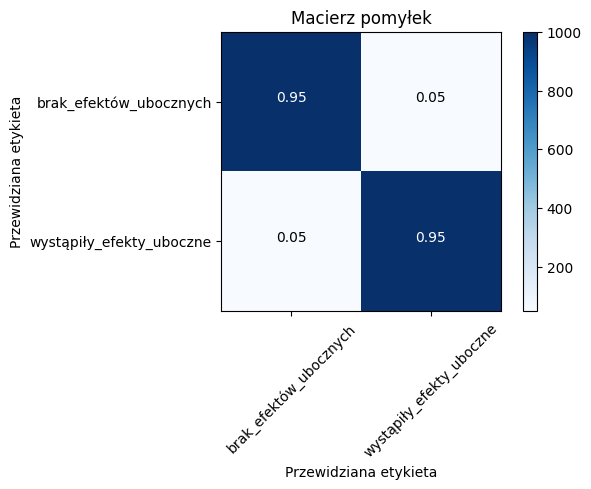

In [49]:
# Etykiety do wykorzystania na osiach wykresu macierzy pomyłek
cm_plot_labels = ['brak_efektów_ubocznych', 'wystąpiły_efekty_uboczne']
# Wywołanie funkcji do rysowania macierzy pomyłek z odpowiednimi parametrami
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, normalize=True, title='Macierz pomyłek')